# Exploring, Preprocessing Data and Machine Learning Prediction

Perform Exploratory Data Analysis, Feature Engineering, and determine Training Labels.

*   Create a column for the class.
*   Standardize the data.
*   Split into training data and test data.

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression.

*   Find the method performs best using test data.

In [2]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Allows to test parameters of classification algorithms and find the 
# best one.
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm.
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm.
from sklearn.svm import SVC
# Decision Tree classification algorithm.
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm.
from sklearn.neighbors import KNeighborsClassifier

sns.set_theme(style='whitegrid')

In [3]:
# Loading Spacex dataset into pandas dataframe.
df = pd.read_csv('dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
df.describe()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,Class
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,6123.547647,1.788889,3.500000,3.188889,-86.366477,29.449963,0.666667
std,26.124701,4732.115291,1.213172,1.595288,4.194417,14.149518,2.141306,0.474045
min,1.000000,350.000000,1.000000,1.000000,0.000000,-120.610829,28.561857,0.000000
25%,23.250000,2510.750000,1.000000,2.000000,0.000000,-80.603956,28.561857,0.000000
50%,45.500000,4701.500000,1.000000,4.000000,1.000000,-80.577366,28.561857,1.000000
75%,67.750000,8912.750000,2.000000,5.000000,4.000000,-80.577366,28.608058,1.000000
max,90.000000,15600.000000,6.000000,5.000000,13.000000,-80.577366,34.632093,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

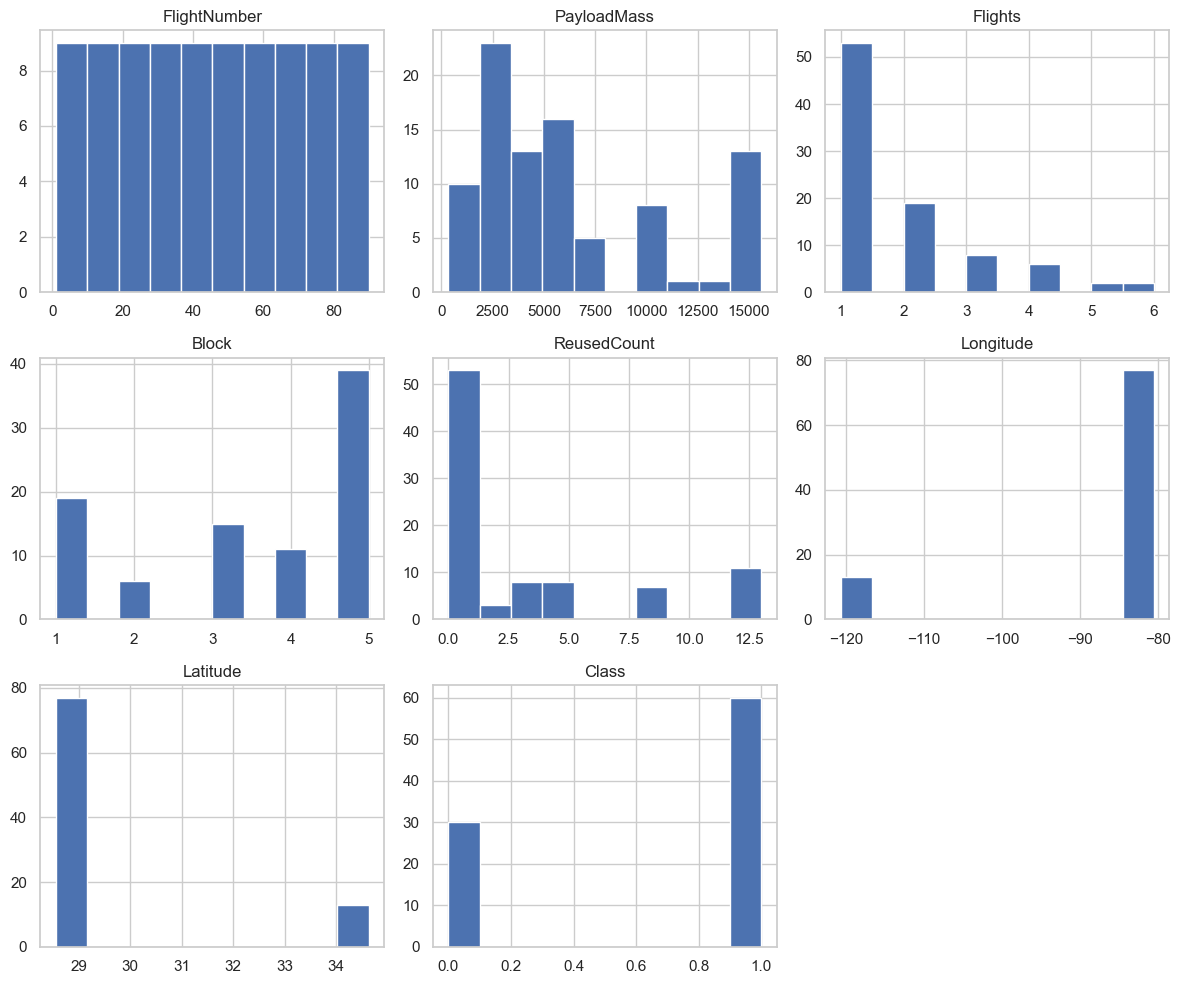

In [6]:
# Histograms for numerical columns.
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

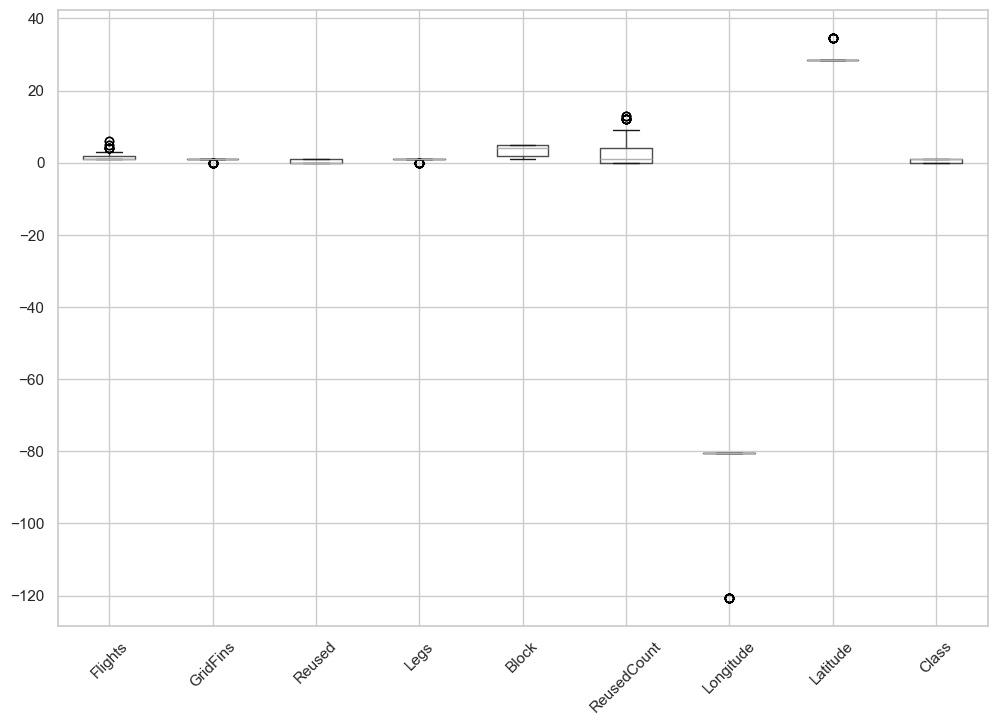

In [7]:
# Box plots for numerical columns.
#sns.set_theme(style='whitegrid')
df.drop(['PayloadMass','FlightNumber'], axis=1).boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

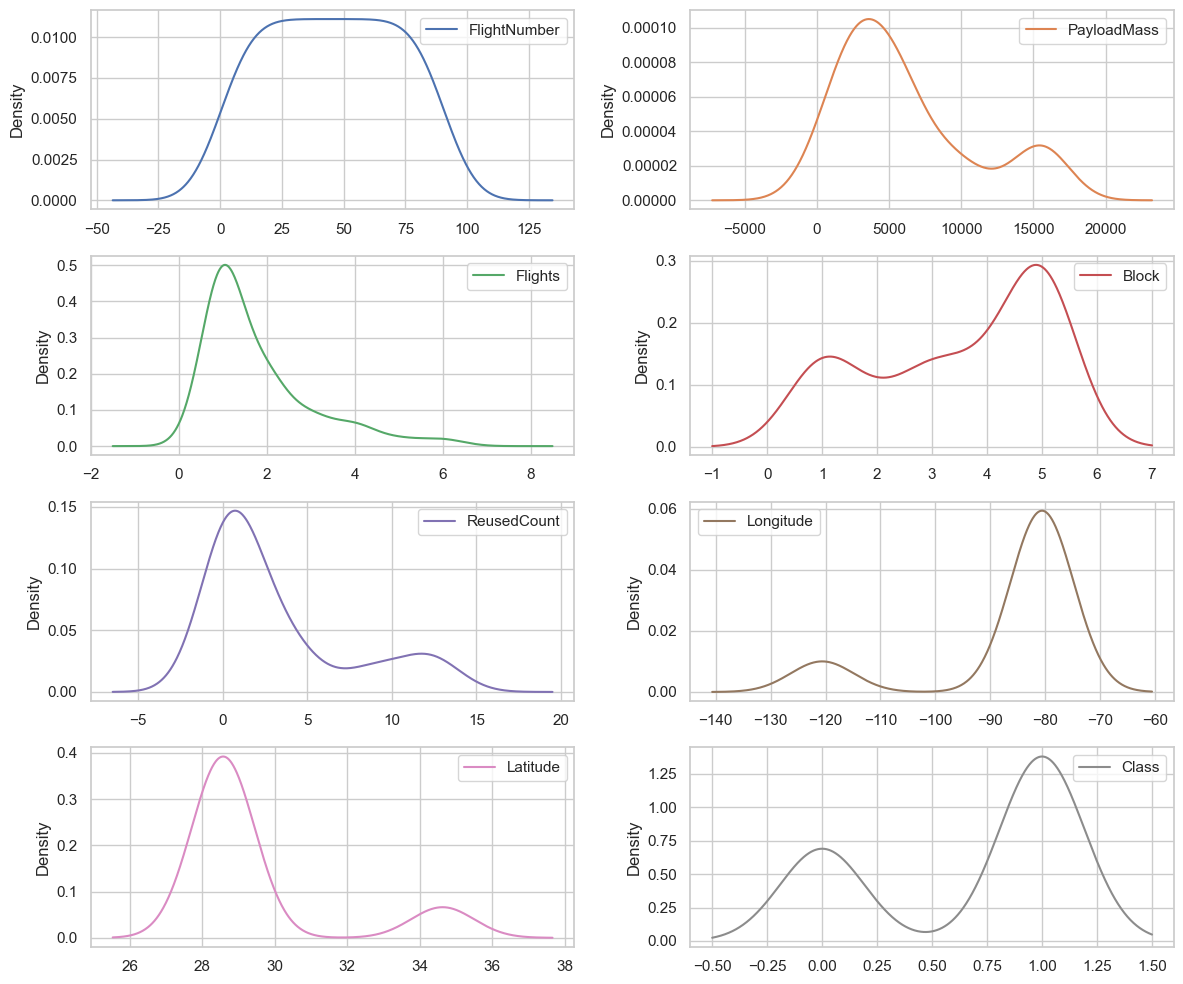

In [8]:
# Density plots for numerical columns.
df.plot(
    kind='density', subplots=True, layout=(4,2), figsize=(12, 10), sharex=False
)
plt.tight_layout()
plt.show()

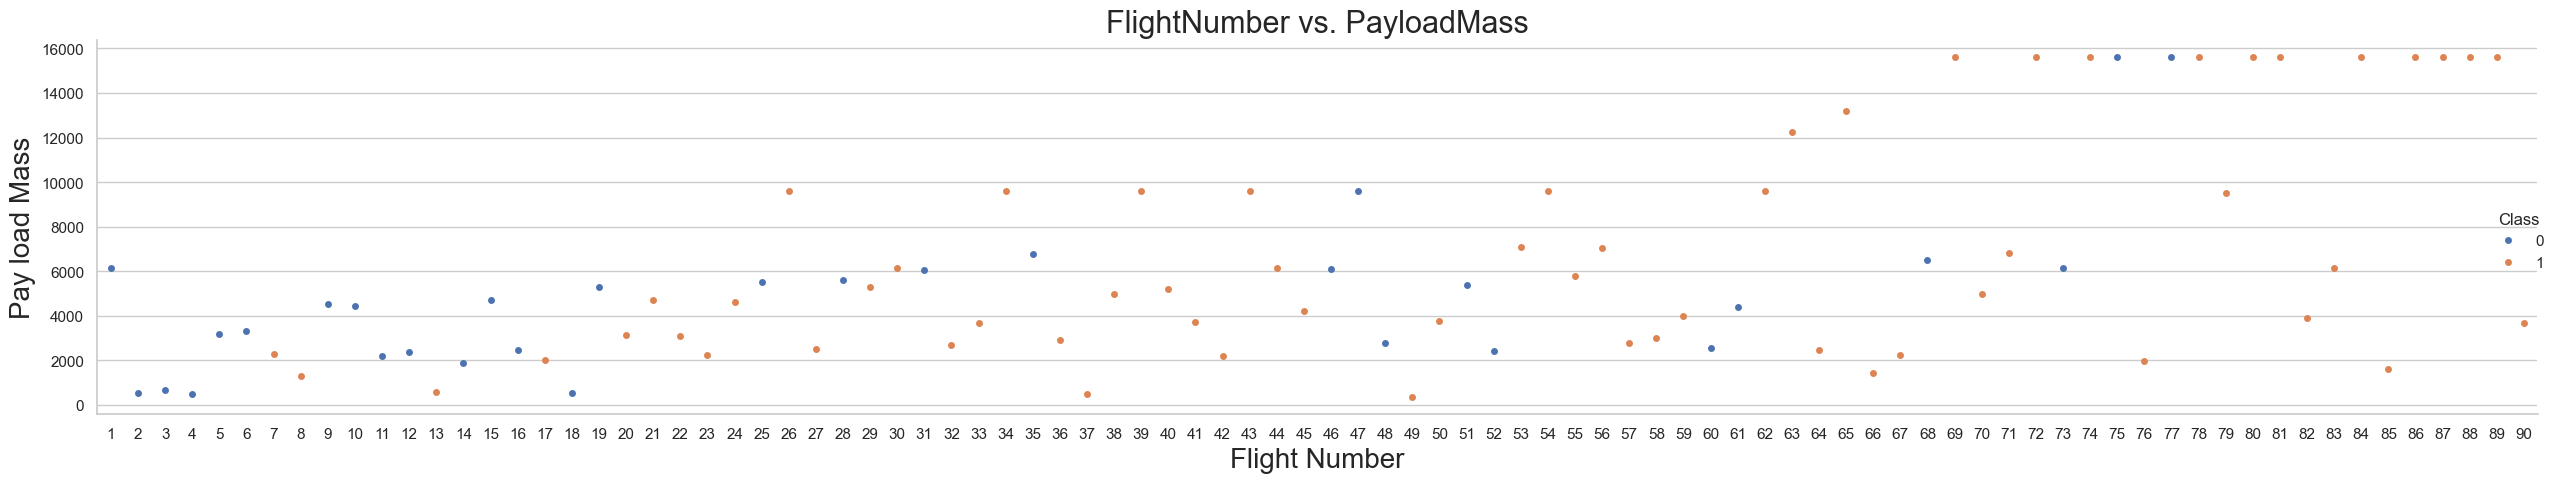

In [9]:
# plotting out the FlightNumber vs. PayloadMass.
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.title('FlightNumber vs. PayloadMass', fontsize=22)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass",fontsize=20)
plt.tight_layout()
plt.show()

According to catplot, as the flight number increases, the first stage is more likely to land successfully. And also Pay Load Mass, it seems the more massive the payload, the less likely the first stage will return.

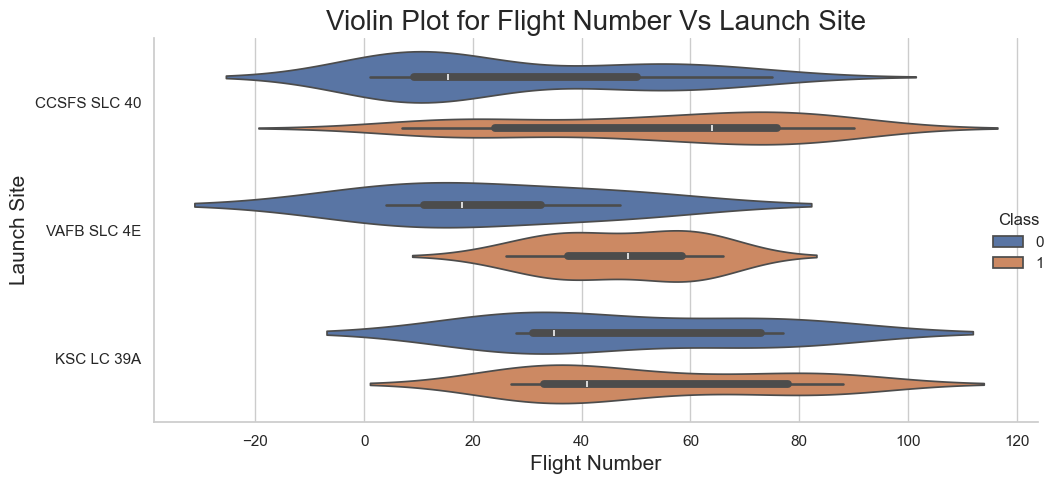

In [10]:
# Visualizing the relationship between Flight Number and Launch Site.
sns.catplot(kind='violin', x='FlightNumber', y='LaunchSite', data=df, hue='Class', aspect=2)
plt.title('Violin Plot for Flight Number Vs Launch Site', fontsize=20)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.tight_layout()
plt.show()

 <code>CCAFS LC-40</code>, has a success rate of 60% approximately, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of over 70% approximately.

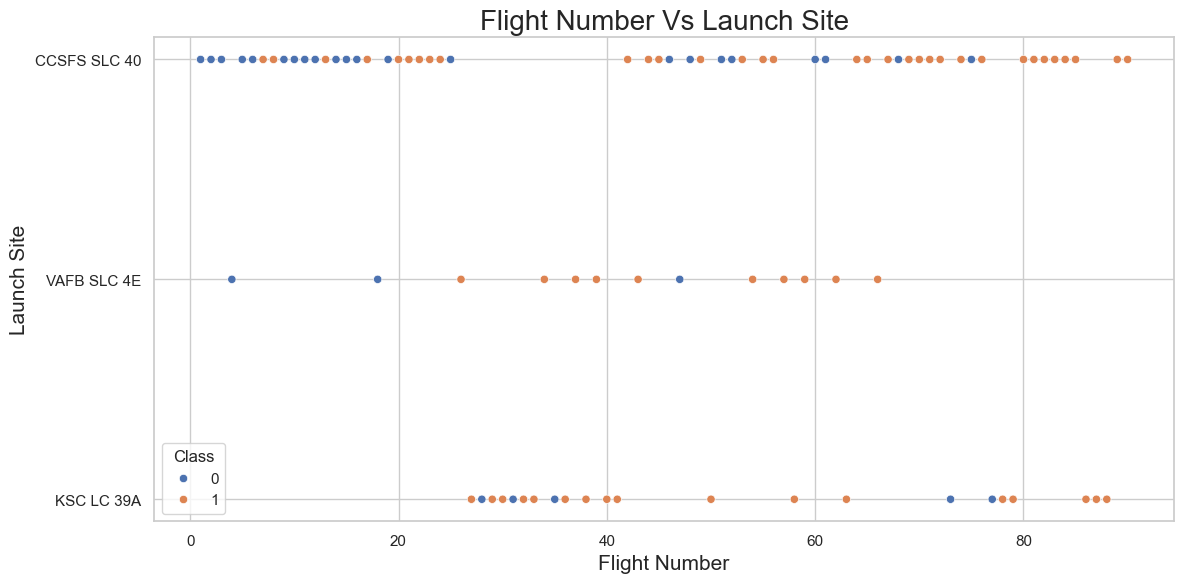

In [11]:
# Plotting a scatter point chart.
plt.figure(figsize=(12,6))
sns.scatterplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df)
plt.title('Flight Number Vs Launch Site', fontsize=20)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.tight_layout()
plt.show()

According to the scatterplot, when Filght Number increases, the Launch Site's first satge landing outcome is  success. VAFB SLC 4E Launch Site, there are no flights over 70 flight number as well as KSC LC 39A Launch Site, there are no flights below 30 flight number.

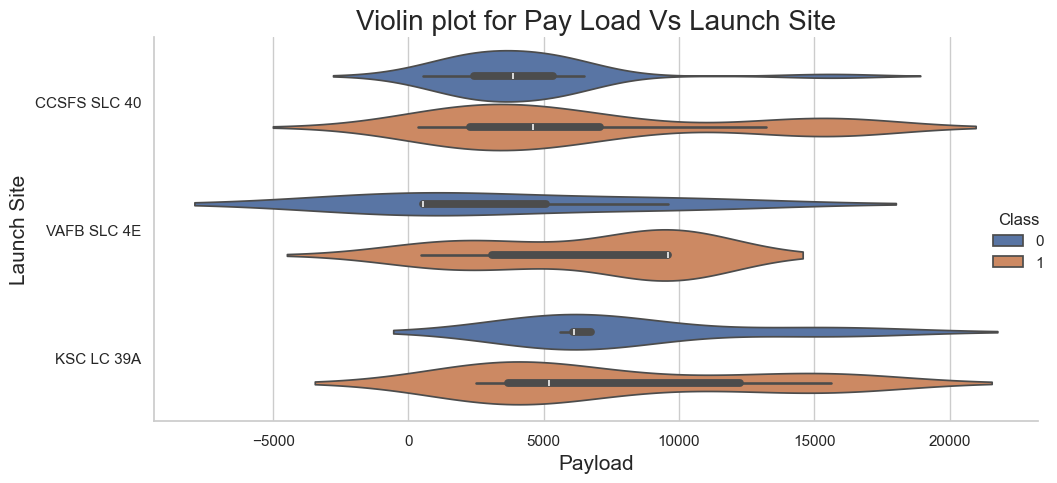

In [12]:
# Visualizing the relationship between Payload and Launch Site.
sns.catplot(kind='violin', y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.title('Violin plot for Pay Load Vs Launch Site', fontsize=20)
plt.xlabel("Payload", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.tight_layout()
plt.show()

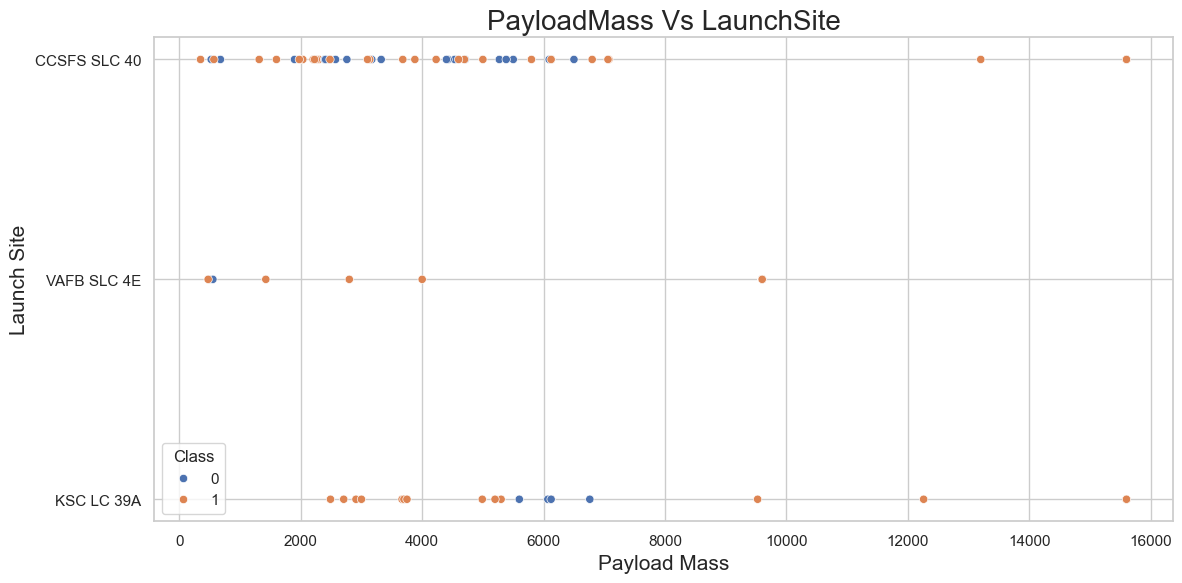

In [13]:
# Plotting a scatter point chart for PayloadMass vs LaunchSite.
plt.figure(figsize=(12,6))

sns.scatterplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df)
plt.title('PayloadMass Vs LaunchSite', fontsize=20)
plt.xlabel("Payload Mass", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.tight_layout()
plt.show()

The VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

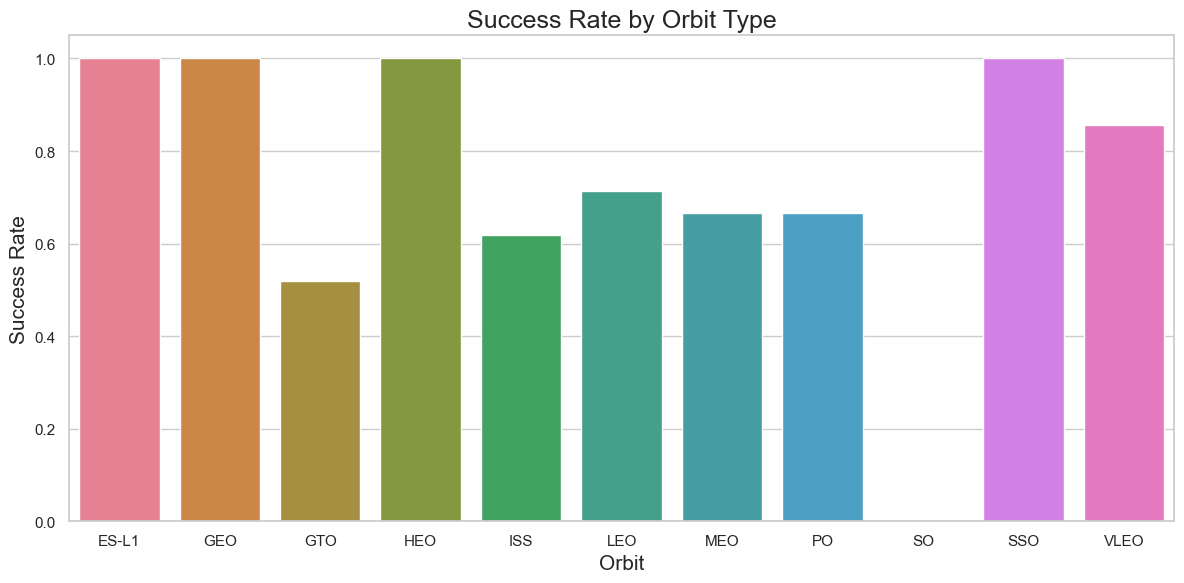

In [14]:
# Visualizing the relationship between success rate of each orbit type
# using bar chart.
success_rate = df.groupby('Orbit')['Class'].mean()

plt.figure(figsize=(12,6))
sns.barplot(x=success_rate.index, y=success_rate.values, hue=success_rate.index)
plt.title('Success Rate by Orbit Type', fontsize=18)
plt.ylabel("Success Rate", fontsize=15)
plt.xlabel("Orbit", fontsize=15)
plt.tight_layout()
plt.show()

The ES-L1, GEO, HEO, and SSO orbit types have the highest success rates.

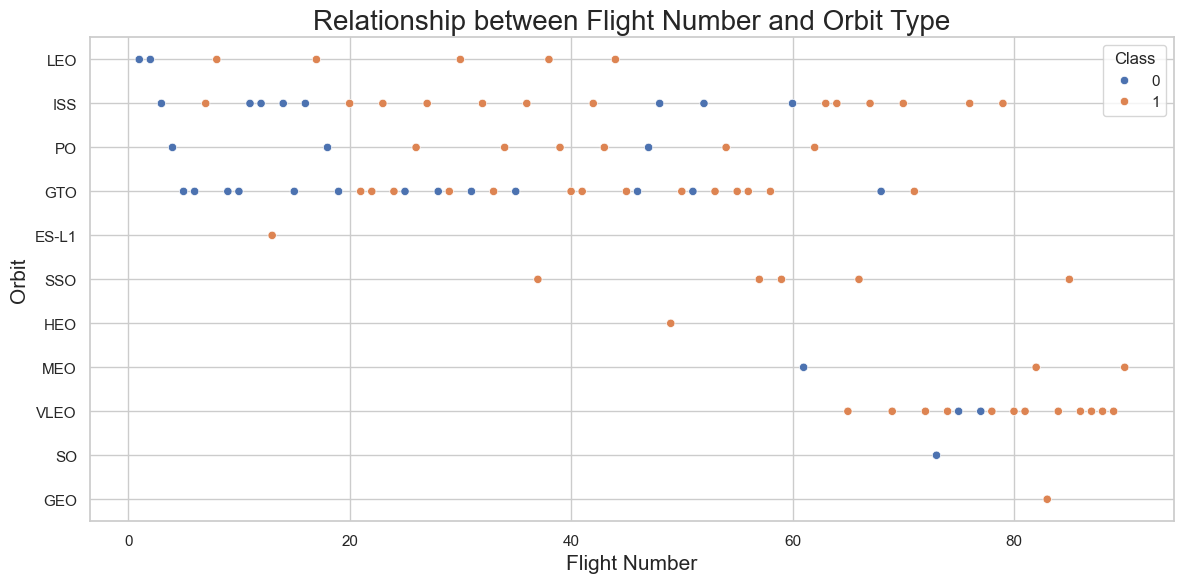

In [15]:
# Visualizing the relationship between FlightNumber and Orbit type.
plt.figure(figsize=(12,6))
sns.scatterplot(y="Orbit", x="FlightNumber", hue="Class",data=df)
plt.title("Relationship between Flight Number and Orbit Type", fontsize=20)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.tight_layout()
plt.show()

Based on the scatterplot, it is observed that in the LEO orbit, the success rate appears to be correlated with flight number; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

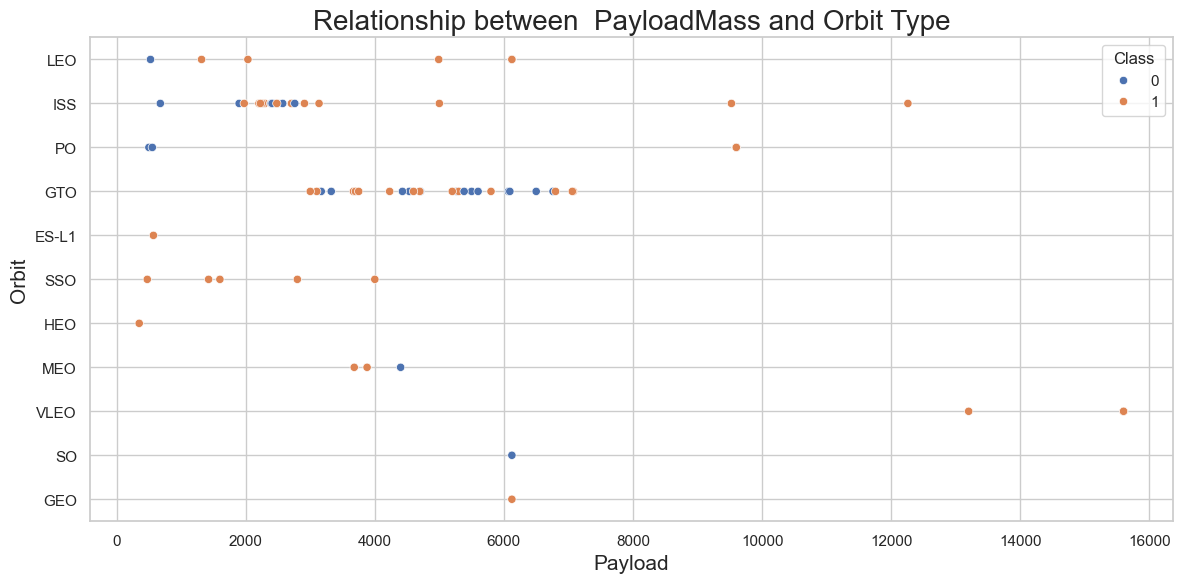

In [16]:
# Visualizing the relationship between Payload and Orbit type.
plt.figure(figsize=(12,6))
sns.scatterplot(y="Orbit", x="PayloadMass", hue="Class", data=df)
plt.title("Relationship between  PayloadMass and Orbit Type", fontsize=20)
plt.xlabel("Payload", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.tight_layout()
plt.show()

With heavy payloads the successful landing rate are more for Polar,LEO and ISS.

However, for GTO cannot be distinguished this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

In [17]:
# Converting the 'Date' column to datetime format with the correct 
# format specified.
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Extracting the year from the 'Date' column.
df['Date'] = df['Date'].dt.year

df.sample(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
33,34,2017,Falcon 9,9600.0,PO,VAFB SLC 4E,True ASDS,1,True,False,True,5e9e3033383ecbb9e534e7cc,3.0,1,B1036,-120.610829,34.632093,1
55,56,2018,Falcon 9,7060.0,GTO,CCSFS SLC 40,True ASDS,1,True,False,True,5e9e3032383ecb6bb234e7ca,5.0,9,B1049,-80.577366,28.561857,1
39,40,2017,Falcon 9,5200.0,GTO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,3.0,1,B1031,-80.603956,28.608058,1
26,27,2017,Falcon 9,2490.0,ISS,KSC LC 39A,True RTLS,1,True,False,True,5e9e3032383ecb267a34e7c7,3.0,1,B1031,-80.603956,28.608058,1
86,87,2020,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058,1


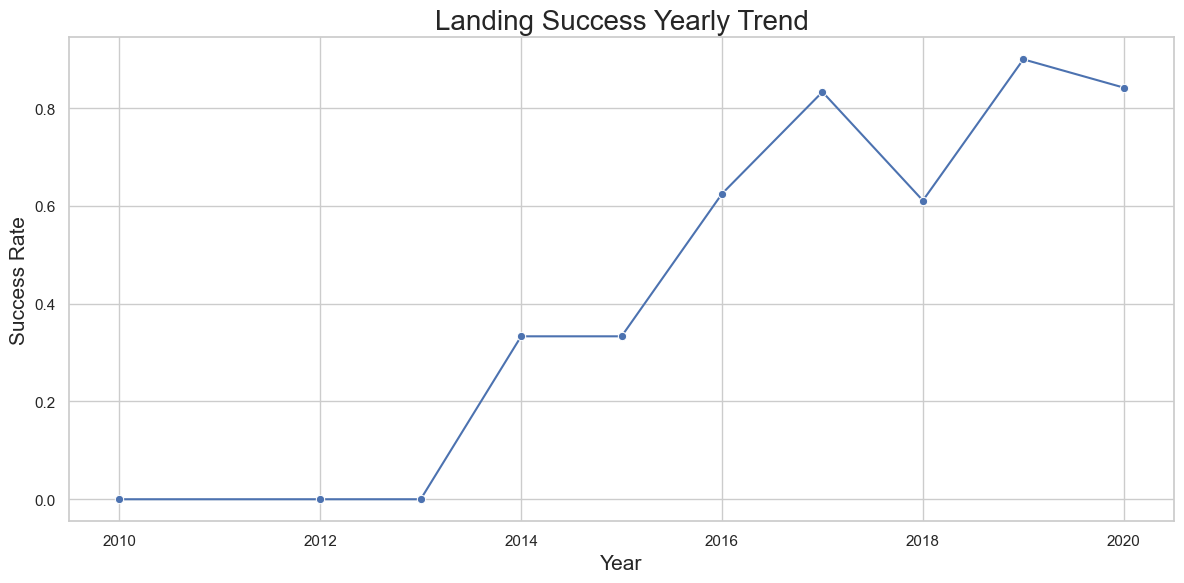

In [18]:
# Visualizing the landing success yearly trend.
yearly_success_rate = df.groupby('Date')['Class'].mean()

plt.figure(figsize=(12,6))
sns.lineplot(
    x=yearly_success_rate.index, 
    y=yearly_success_rate.values, 
    marker="o"
)
plt.title("Landing Success Yearly Trend", fontsize=20)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.tight_layout()
plt.show()

The success rate has steadily risen from 2013 to 2020.

## Features Engineering

In [19]:
# Selecting the features that will be used in success prediction.
features = df[[
    'FlightNumber', 
    'PayloadMass', 
    'Orbit', 
    'LaunchSite', 
    'Flights', 
    'GridFins', 
    'Reused', 
    'Legs', 
    'LandingPad', 
    'Block', 
    'ReusedCount', 
    'Serial'
]]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [20]:
# Using the function get_dummies and features dataframe to apply 
# OneHotEncoder to the column Orbits, LaunchSite, LandingPad,and Serial. 
# Assigning the value to the variable features_one_hot.
column_to_encode = ["Orbit", "LaunchSite", "LandingPad", "Serial"]
features_one_hot = pd.get_dummies(features, columns=column_to_encode)
features_one_hot.head() 

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Casting all columns to `float64`.
numeric_boolean_cols = features_one_hot.select_dtypes(
    include=['number', 'bool']
).columns
features_one_hot[numeric_boolean_cols] = features_one_hot[
    numeric_boolean_cols
].astype('float64')

features_one_hot

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
# Creating a NumPy array from the column 'Class' in 'df', by applying 
# the method to_numpy() then assigning it  to the variable 'Y'.
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
# Standardizing the data in 'features_one_hot' then reassigning it to 
# the variable 'X'.
from sklearn.preprocessing import StandardScaler
transform = preprocessing.StandardScaler()
scaler = StandardScaler()
X = scaler.fit_transform(features_one_hot)

In [24]:
# Spliting the data into training and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=42
)

In [25]:
Y_test.shape

(18,)

In [31]:
# Creating a logistic regression object  then creating a  GridSearchCV 
# object 'logreg_cv' with cv = 10.  Fitting the object to find the best 
# parameters from the dictionary 'parameters'.
parameters = {
    'C':[0.01,0.1,1],
    'penalty':['l2'],
    'solver':['lbfgs']
}

lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [32]:
# Displaying the best parameters using the data attribute best_params\_
# and the accuracy on the validation data using the data attribute 
# best_score\_.
print("Tuned Hpyerparameters :(Best Parameters) ",logreg_cv.best_params_)
print("Accuracy :",logreg_cv.best_score_)

Tuned Hpyerparameters :(Best Parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy : 0.8303571428571427


In [33]:
# Calculating the accuracy on the test data using the method 'score'.
accuracy = logreg_cv.score(X_test, Y_test)
print(f"Accuracy on the test data :{accuracy: .2f}")

Accuracy on the test data : 0.94


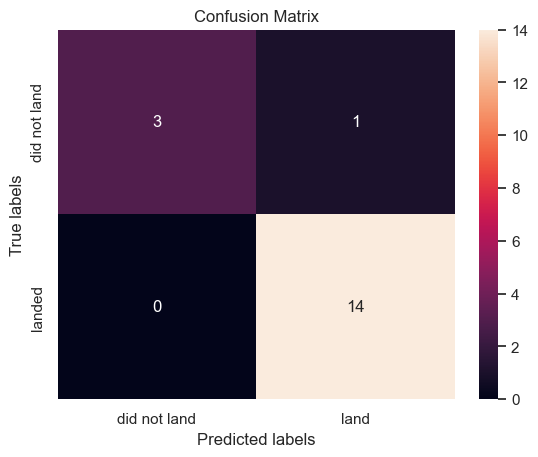

In [34]:
# Confusion matrix.
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(
        ['did not land', 'land']
    ); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Logistic regression can distinguish between the different classes.  I see that the major problem is false positives.

In [35]:
# Creating a support vector machine object then creating a 'GridSearchCV'
# object 'svm_cv' with cv=10.  Fitting the object to find the best 
# parameters from the dictionary 'parameters'.
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [37]:
# Displaying the best parameters using the data attribute best_params\_
# and the accuracy on the validation data using the data attribute 
# best_score\_.
print("Tuned Hpyerparameters :(Best parameters) ",svm_cv.best_params_)
print("Accuracy :",svm_cv.best_score_)

Tuned Hpyerparameters :(Best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy : 0.8321428571428571


In [38]:
# Calculating the accuracy on the test data using the method score.
accuracy = svm_cv.score(X_test, Y_test)
print(f"Accuracy on the test data: {accuracy: .2f}")

Accuracy on the test data:  0.89


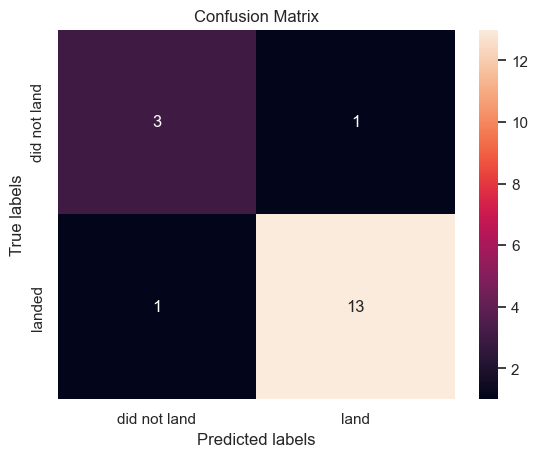

In [39]:
# Confusion matrix.
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [40]:
# Creating a decision tree classifier object then  creating a 
# 'GridSearchCV' object 'tree_cv' with cv = 10.  Fitting the object to 
# find the best parameters from the dictionary 'parameters'.
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [ 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [42]:
# Displaying the best parameters using the data attribute best_params\_
# and the accuracy on the validation data using the data attribute 
# best_score\_.
print("Tuned Hpyerparameters :(Best parameters) ",tree_cv.best_params_)
print("Accuracy :",tree_cv.best_score_)

Tuned Hpyerparameters :(Best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy : 0.8625


In [43]:
# Calculating the accuracy on the test data using the method score.
accuracy = tree_cv.score(X_test, Y_test)
print(f"accuracy on the test data : {accuracy: .2f}")

accuracy on the test data :  0.72


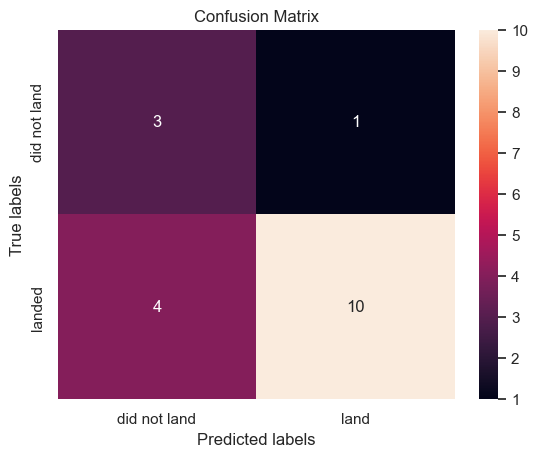

In [44]:
# Confusion matrix.
yhat=tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [45]:
# Creating a k nearest neighbors object then  creating a 'GridSearchCV' 
# object 'knn_cv' with cv = 10.  Fitting the object to find the best 
# parameters from the dictionary 'parameters'.
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [47]:
# Displaying the best parameters using the data attribute best_params\_
# and the accuracy on the validation data using the data attribute 
# best_score\_.
print("Tuned Hpyerparameters :(Best parameters) ",knn_cv.best_params_)
print("Accuracy :",knn_cv.best_score_)

Tuned Hpyerparameters :(Best parameters)  {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
Accuracy : 0.8160714285714284


In [48]:
# Calculating the accuracy on the test data using the method score.
accuracy = knn_cv.score(X_test, Y_test)
print(f"Accuracy on the test data : {accuracy: .2f}")

Accuracy on the test data :  0.89


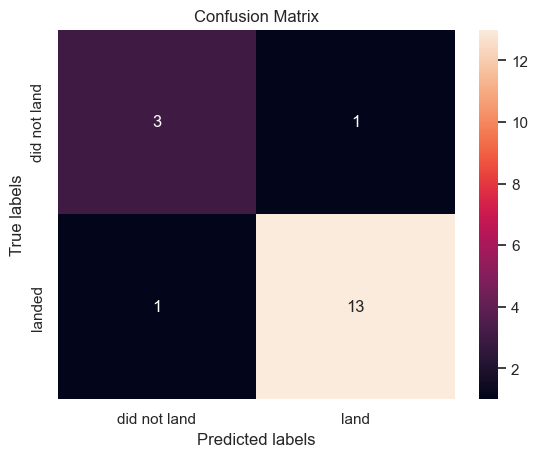

In [49]:
# Confusion matrix.
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# Conclusion
In this analysis, I trained and tuned four different machine learning models to classify the data: Logistic Regression, Support Vector Machine (SVM), Decision Tree, and K-Nearest Neighbors (KNN). Here are the insights from the models' performance on both the training and test datasets:

### Logistic Regression:

    Best Hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
    Training Accuracy: 83.04%
    Test Accuracy: 94.00%
    The Logistic Regression model performed well on the test data, indicating good generalization with an impressive test accuracy of 94.00%.

### Support Vector Machine (SVM):

    Best Hyperparameters: {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
    Training Accuracy: 83.21%
    Test Accuracy: 83.00%
    The SVM model also showed decent performance with a test accuracy of 83.00%. However, its accuracy was slightly lower compared to Logistic Regression.

### Decision Tree:

    Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
    Training Accuracy: 86.25%
    Test Accuracy: 72.00%
    The Decision Tree model had the highest training accuracy of 86.25%, but its test accuracy dropped to 72.00%, suggesting overfitting to the training data.

### K-Nearest Neighbors (KNN):

    Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 8, 'p': 1}
    Training Accuracy: 81.61%
    Test Accuracy: 89.00%
    The KNN model performed well with a test accuracy of 89.00%, which is quite good, indicating that it is a strong contender alongside Logistic Regression.

Based on the accuracy results, the Logistic Regression model is the best performing model for the dataset, achieving the highest test accuracy of 94.00%. This indicates that it generalizes well to unseen data, making it a reliable choice.

The K-Nearest Neighbors (KNN) model also performed well with a test accuracy of 89.00%.

The Support Vector Machine (SVM), although slightly less accurate.

The Decision Tree model, its high training accuracy, showed significant overfitting, evidenced by the lower test accuracy